In [1]:
from distribution import TestDistribution

from RTER import RegressionTree

import numpy as np

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from time import time
import os

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

import matplotlib.pyplot as plt

In [8]:


#distribution_index_vec=[1,2,3,4]





np.random.seed(1)



sample_generator=TestDistribution(2).returnDistribution()
n_test, n_train = 10000,3000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)



# RTER with cv
time_start=time()
parameters={"truncate_ratio_low":[0], "truncate_ratio_up":[0.6,0.8 ],
           "min_samples_split":[10,30], "max_depth":[2,4,6],
           "order":[0,1,3,6],"splitter":["varreduction","maxedge"],
            "estimator":["naive_estimator", "pointwise_extrapolation_estimator"],
           "r_range_low":[0],"r_range_up":[1],
           "step":[1,2,4],"lamda":[0.005,0.01,0.05]}
cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=10, n_jobs=20)
cv_model_RTER.fit(X_train, Y_train)

RTER_model = cv_model_RTER.best_estimator_
mse_score= - RTER_model.score(X_test, Y_test)
y_hat_RTER = RTER_model.predict(X_test)

time_end=time()

print("RTER: mse {} time {}".format(mse_score,time_end-time_start))

'''
# boosting
time_start=time()
parameters={"rho":[0.01,0.05,0.1,0.2], "boost_num":[20,50,100],
            "min_samples_split":[2,5,10,20,30], 
            "max_depth":[3,4,5,6,7,8],"splitter":["maxedge"]}
cv_model_boosting=GridSearchCV(estimator=RegressionTreeBoosting(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_boosting.fit(X_train, Y_train)

boosting_model = cv_model_boosting.best_estimator_
mse_score= - boosting_model.score(X_test, Y_test)

time_end=time()

print("boosting: mse {} time {}".format(mse_score,time_end-time_start))


# ensemble
time_start=time()
parameters={ "ensemble_num":[20,50,100,200,500,1000,2000],
            "min_samples_split":[2,5,10,20,30], 
            "max_depth":[3,4,5,6,7,8],"splitter":["maxedge"]}
cv_model_ensemble=GridSearchCV(estimator=RegressionTreeEnsemble(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_ensemble.fit(X_train, Y_train)

ensemble_model = cv_model_ensemble.best_estimator_
mse_score= - ensemble_model.score(X_test, Y_test)

time_end=time()

print("ensemble: mse {} time {}".format(mse_score,time_end-time_start))
'''


# GBRT
time_start=time()

parameters= {"n_estimators":[500,1000,2000], "learning_rate":[0.01,0.05]}
cv_model_GBRT=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_GBRT.fit(X_train, Y_train)
model_GBRT = cv_model_GBRT.best_estimator_
model_GBRT.fit(X_train, Y_train.ravel())

y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("GBRT: mse {} time {}".format(mse_score,time_end-time_start))

'''
# RF
time_start=time()

parameters = {"n_estimators":[10,100,200]}
cv_model_RFR = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parameters, cv=10, n_jobs=-1) 
cv_model_RFR.fit(X_train, Y_train)
model_RFR = cv_model_RFR.best_estimator_
model_RFR.fit(X_train, Y_train)

y_hat=model_RFR.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("RF: mse {} time {}".format(mse_score,time_end-time_start))

# EKNN
time_start=time()

parameters = {"V":[3,5,7,9,11,13,15,17,19], "C":[5,7,9,10,11,13,15],"alpha":[0.01,0.05]}
cv_model_EKNN = GridSearchCV(estimator=EKNN(),param_grid=parameters, cv=10, n_jobs=-1) 
cv_model_EKNN.fit(X_train, Y_train)
model_EKNN = cv_model_EKNN.best_estimator_
model_EKNN.fit(X_train, Y_train)

y_hat=model_EKNN.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("EKNN: mse {} time {}".format(mse_score,time_end-time_start))
'''

KeyboardInterrupt: 

In [3]:
cv_model_RTER.best_params_

{'estimator': 'pointwise_extrapolation_estimator',
 'lamda': 0.01,
 'max_depth': 4,
 'min_samples_split': 10,
 'order': 1,
 'r_range_low': 0,
 'r_range_up': 1,
 'splitter': 'varreduction',
 'step': 2,
 'truncate_ratio_low': 0,
 'truncate_ratio_up': 0.8}

/home/karl/RTER/RTER/_utils.py:220: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  return sorted_ratio, pre_vec,  (np.linalg.inv(ratio_mat_final.T @ ratio_mat_final+ id_matrix*lamda) @ ratio_mat_final.T @ pre_vec_final )[0,0], ratio_mat_final @ np.linalg.inv(ratio_mat_final.T @ ratio_mat_final) @ ratio_mat_final.T
/home/karl/RTER/RTER/_utils.py:220: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, F))
  return sorted_ratio, pre_vec,  (np.linalg.inv(ratio_mat_final.T @ ratio_mat_final+ id_matrix*lamda) @ ratio_mat_final.T @ pre_vec_final )[0,0], ratio_mat_final @ np.linalg.inv(ratio_mat_final.T @ ratio_mat_final) @ ratio_mat_final.T
/home/karl/RTER/RTER/_utils.py:220: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  return sorted_ratio, pre_vec,  (np.linalg.inv(ratio_mat_final.T @ 

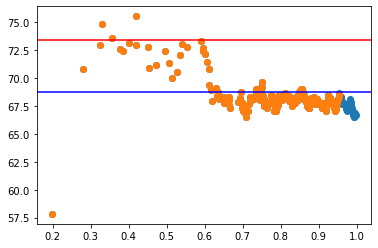

In [7]:
node_idx=0
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up,step,lamda = 1,0,0.8,0,1,1,0.01
query_obj=list(RTER_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.01
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up= order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up

sorted_ratio, sorted_prediction, intercept, mat = RTER_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up,step,lamda)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(sample_generator.evaluate(X_extra.reshape(1,-1)),color="blue")